In [1]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

Attributes description taken from that page: https://archive.ics.uci.edu/ml/datasets/Automobile

Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


Get pandas to display all columns (the dataset was truncated)

In [3]:
pd.set_option('display.max_columns', 26)

Create the automobile data frame by loading the csv file, adding the missing header row and quickly inspect it using the head() method
and make sure I don't have any missing columns and they have the appropriate name.

In [4]:
data = 'Automobile.csv'
automobile = pd.read_csv(data, sep="#", header=None, names=['Symboling', 
                                                          'Normalised-losses', 
                                                          'Make', 
                                                          'Fuel-type',
                                                          'Aspiration',
                                                          'Num-of-doors', 
                                                          'Body-style',
                                                          'Drive-wheels' ,
                                                          'Engine-location', 
                                                          'Wheel-base',
                                                          'Length',
                                                          'Width',
                                                          'Height', 
                                                          'Curb-weight', 
                                                          'Engine-type',
                                                          'Num-of-cylinders', 
                                                          'Engine-size', 
                                                          'Fuel-system', 
                                                          'Bore', 
                                                          'Stroke', 
                                                          'Compression-ratio', 
                                                          'Horsepower', 
                                                          'Peak-rpm', 
                                                          'City-mpg', 
                                                          'Highway-mpg', 
                                                          'Price'])
automobile.head()

,Symboling,Normalised-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,Length,Width,Height,Curb-weight,Engine-type,Num-of-cylinders,Engine-size,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Checking the size of the dataset, this tells me it has 238 rows and 26 columns

In [5]:
automobile.shape

(238, 26)

Here I want to check if some data type would need any change

In [6]:
automobile.dtypes

Symboling              int64
Normalised-losses    float64
Make                  object
Fuel-type             object
Aspiration            object
Num-of-doors          object
Body-style            object
Drive-wheels          object
Engine-location       object
Wheel-base           float64
Length               float64
Width                float64
Height               float64
Curb-weight            int64
Engine-type           object
Num-of-cylinders      object
Engine-size            int64
Fuel-system           object
Bore                 float64
Stroke               float64
Compression-ratio    float64
Horsepower           float64
Peak-rpm             float64
City-mpg               int64
Highway-mpg            int64
Price                float64
dtype: object

Here I'm having a quick glance at the dataframe and can already see that I'm going to have to deal with spelling mistake and missing values

In [7]:
automobile.info

<bound method DataFrame.info of      Symboling  Normalised-losses         Make Fuel-type Aspiration  \
0            3                NaN  alfa-romero       gas        std   
1            3                NaN  alfa-romero       gas        std   
2            1                NaN  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
233         -1               95.0       volvo        gas        std   
234         -1                NaN       volvo     diesel      turbo   
235         -1                NaN   vol00112ov       gas      turbo   
236         -1               95.0        volvo    diesel   turrrrbo   
237         -1               95.0        volvo       gas      turbo   

    Num-of-doors   Body-style Drive-wheels Engine-location  Wheel-base  \
0            two  convertible          rw

The .describe() method helps me further detecting possible issues in the dataset. Here I can see straight away that there are issues with the symboling values (4 is not a valid ranking), there is an issue with the price of a car too.
That also tells me I have null values in 6 columns.

In [8]:
automobile.describe()

,Symboling,Normalised-losses,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
count,238.000000,191.000000,238.00000,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,234.000000,238.000000,236.000000,236.000000,238.000000,238.000000,234.000000
mean,0.642857,116.863874,100.15042,176.094538,66.306303,53.987815,2628.159664,129.575630,3.361282,3.243120,10.458908,107.152542,5140.889831,24.638655,30.016807,13696.081197
std,1.360446,36.171118,6.59659,12.534385,2.230344,2.366944,517.099334,39.453019,0.290631,0.301348,4.384463,38.288297,456.806273,6.357468,6.681397,8060.776465
min,-2.000000,25.000000,86.60000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,0.000000
25%,0.000000,94.000000,95.15000,168.700000,64.400000,52.000000,2224.750000,98.000000,3.150000,3.112500,8.700000,75.250000,4800.000000,19.000000,25.000000,7823.000000
50%,0.000000,104.000000,98.40000,175.500000,66.050000,54.400000,2548.000000,122.000000,3.350000,3.270000,9.000000,102.000000,5200.000000,24.000000,29.000000,11253.500000
75%,2.000000,145.000000,105.57500,188.800000,68.400000,55.500000,3049.000000,145.000000,3.620000,3.400000,9.500000,121.000000,5500.000000,28.750000,34.000000,17890.000000
max,4.000000,256.000000,120.90000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Here I'm confirming which column have missing values and how many

In [9]:
automobile.isna().sum()

Symboling             0
Normalised-losses    47
Make                  0
Fuel-type             0
Aspiration            0
Num-of-doors          2
Body-style            0
Drive-wheels          0
Engine-location       0
Wheel-base            0
Length                0
Width                 0
Height                0
Curb-weight           0
Engine-type           0
Num-of-cylinders      0
Engine-size           0
Fuel-system           0
Bore                  4
Stroke                4
Compression-ratio     0
Horsepower            2
Peak-rpm              2
City-mpg              0
Highway-mpg           0
Price                 4
dtype: int64

In [10]:
automobile.columns

Index(['Symboling', 'Normalised-losses', 'Make', 'Fuel-type', 'Aspiration',
       'Num-of-doors', 'Body-style', 'Drive-wheels', 'Engine-location',
       'Wheel-base', 'Length', 'Width', 'Height', 'Curb-weight', 'Engine-type',
       'Num-of-cylinders', 'Engine-size', 'Fuel-system', 'Bore', 'Stroke',
       'Compression-ratio', 'Horsepower', 'Peak-rpm', 'City-mpg',
       'Highway-mpg', 'Price'],
      dtype='object')

# Dealing with impossible values

The attribute range for symboling is: -3, -2, -1, 0, 1, 2, 3, I'm going to assume that 4 was an error and replace it by the highest value within the range, so 3.

In [11]:
symboling = automobile['Symboling']
symboling.replace(4, 3, inplace=True)
symboling.value_counts()

 0    67
 1    54
-1    52
 2    32
 3    30
-2     3
Name: Symboling, dtype: int64

# Dealing with spelling mistakes and whitespaces.

Here I'm mainly dealing columns with non numeric values

In [12]:
make_striped = automobile['Make'].str.strip()
make = make_striped.str.lower()
make.replace('vol00112ov', 'volvo', inplace=True)
automobile['Make'] = make
automobile['Make'].value_counts()

volvo            44
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: Make, dtype: int64

In [13]:
fuel_striped = automobile['Fuel-type'].str.strip()
fuel = fuel_striped.str.lower()
automobile['Fuel-type'] = fuel
automobile['Fuel-type'].value_counts()

gas       210
diesel     28
Name: Fuel-type, dtype: int64

In [14]:
aspiration_striped = automobile['Aspiration'].str.strip()
aspiration = aspiration_striped.str.lower()
aspiration.replace('turrrrbo', 'turbo', inplace=True)
automobile['Aspiration'] = aspiration
automobile['Aspiration'].value_counts()

std      178
turbo     60
Name: Aspiration, dtype: int64

In [15]:
doors_striped = automobile['Num-of-doors'].str.strip()
doors = doors_striped.str.lower()
doors.replace('fourr', 'four', inplace=True)
automobile['Num-of-doors'] = doors
automobile['Num-of-doors'].value_counts()

four    147
two      89
Name: Num-of-doors, dtype: int64

In [16]:
body_style_striped = automobile['Body-style'].str.strip()
body_style = body_style_striped.str.lower()
automobile['Body-style'] = body_style
automobile['Body-style'].value_counts()

sedan          127
hatchback       70
wagon           27
hardtop          8
convertible      6
Name: Body-style, dtype: int64

In [17]:
wheels_striped = automobile['Drive-wheels'].str.strip()
wheels = wheels_striped.str.lower()
automobile['Drive-wheels'] = wheels
automobile['Drive-wheels'].value_counts()

fwd    120
rwd    109
4wd      9
Name: Drive-wheels, dtype: int64

In [18]:
engine_loc_striped = automobile['Engine-location'].str.strip()
engine_loc = engine_loc_striped.str.lower()
automobile['Engine-location'] = engine_loc
automobile['Engine-location'].value_counts()

front    235
rear       3
Name: Engine-location, dtype: int64

In [19]:
engine_type_striped = automobile['Engine-type'].str.strip()
engine_type = engine_type_striped.str.lower()
automobile['Engine-type'] = engine_type
automobile['Engine-type'].value_counts()

ohc      176
ohcv      18
ohcf      15
dohc      12
l         12
rotor      4
dohcv      1
Name: Engine-type, dtype: int64

In [20]:
cylinders_striped = automobile['Num-of-cylinders'].str.strip()
cylinders = cylinders_striped.str.lower()
automobile['Num-of-cylinders'] = cylinders
automobile['Num-of-cylinders'].value_counts()

four      179
six        37
five       11
eight       5
two         4
twelve      1
three       1
Name: Num-of-cylinders, dtype: int64

In [21]:
fuel_striped = automobile['Fuel-system'].str.strip()
fuel = fuel_striped.str.lower()
automobile['Fuel-system'] = fuel
automobile['Fuel-system'].value_counts()


mpfi    119
2bbl     66
idi      28
1bbl     11
spdi      9
4bbl      3
mfi       1
spfi      1
Name: Fuel-system, dtype: int64

# Dealing with missing values

The attribute range for Normalised-losses is continuous from 65 to 256 so I'm going to replace the missing values by the mean of that range (193)

In [22]:
automobile.head(20)
"""
    my initial idea was to average the normalised losses per make to get more accurate values.
    Not sure what's the prefered method here. 
"""

# automobile.to_excel("output_striped.xlsx") 
# automobile['Normalised-losses'].fillna(-1, inplace=True)
# nullmaKe = automobile.loc[automobile['Normalised-losses'] == -1, 'Make'] 
# makes_list = set(nullmaKe)
# for i in makes_list:
#     make = i
#     mean = automobile[['Normalised-losses']][automobile.Make == make].mean()
#     print(make, mean)
# automobile[['Normalised-losses','Num-of-doors', 'Bore', 'Stroke', 'Horsepower', 'Peak-rpm', 'Price']].fillna(value=-1, inplace=True)
losses = automobile['Normalised-losses']
losses.fillna(round(automobile['Normalised-losses'].mean(axis=0)),inplace=True)
losses.isna().value_counts()


False    238
Name: Normalised-losses, dtype: int64

In [23]:
# I'm checking the rows who have null values
numdoor = automobile['Num-of-doors']
nodoors = pd.isnull(numdoor)
# Here I'm checking against the Body-style, I'm assuming sedans have 4 doors as opossed to coupe or hatchback so I set the null value to 'four'
numdoor.fillna(value='four', inplace=True)

In [24]:
bore = automobile['Bore']
nobore= pd.isnull(bore)
bore.fillna(round(bore.mean(axis=0), 2),inplace=True)

In [25]:
stroke = automobile['Stroke']
nostroke= pd.isnull(stroke)
stroke.fillna(round(stroke.mean(axis=0), 2),inplace=True)

In [26]:

horsepower = automobile['Horsepower']
nohp = pd.isnull(horsepower)
horsepower.fillna(round(horsepower.mean(axis=0)),inplace=True)


In [27]:
rpm = automobile['Peak-rpm']
rpm.isna().value_counts()
rpm.fillna(round(rpm.mean(axis=0)),inplace=True)

In [78]:
price = automobile['Price']
# free_car = automobile.loc[price == 0] 
free_car = pd.isnull(price)
automobile['Price'].replace(0, np.NaN, inplace=True)
price.isna().value_counts()
automobile[free_car]
nullmaKe = automobile.loc[automobile['Price'].isnull() , 'Make'] 
makes_list = set(nullmaKe)

def freeCar(make):
    make_mask = automobile['Make'] == make
    car = automobile[make_mask]
    free_car_mask = car[['Price']].isnull()
    row_has_NaN = free_car_mask.any(axis=1)
    free_car = car[row_has_NaN]
    return free_car

for make in makes_list:
    mean = automobile[['Price']][automobile.Make == make].mean()
    car =  freeCar(make)
    car['Price'].fillna(round(mean, 2), inplace=True)
    
price.isna().value_counts()


False    228
True      10
Name: Price, dtype: int64

In [29]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values
# symboling -> ordinal
# price -> numerical
# body-style - nominal

#Code goes after this line



In [30]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line




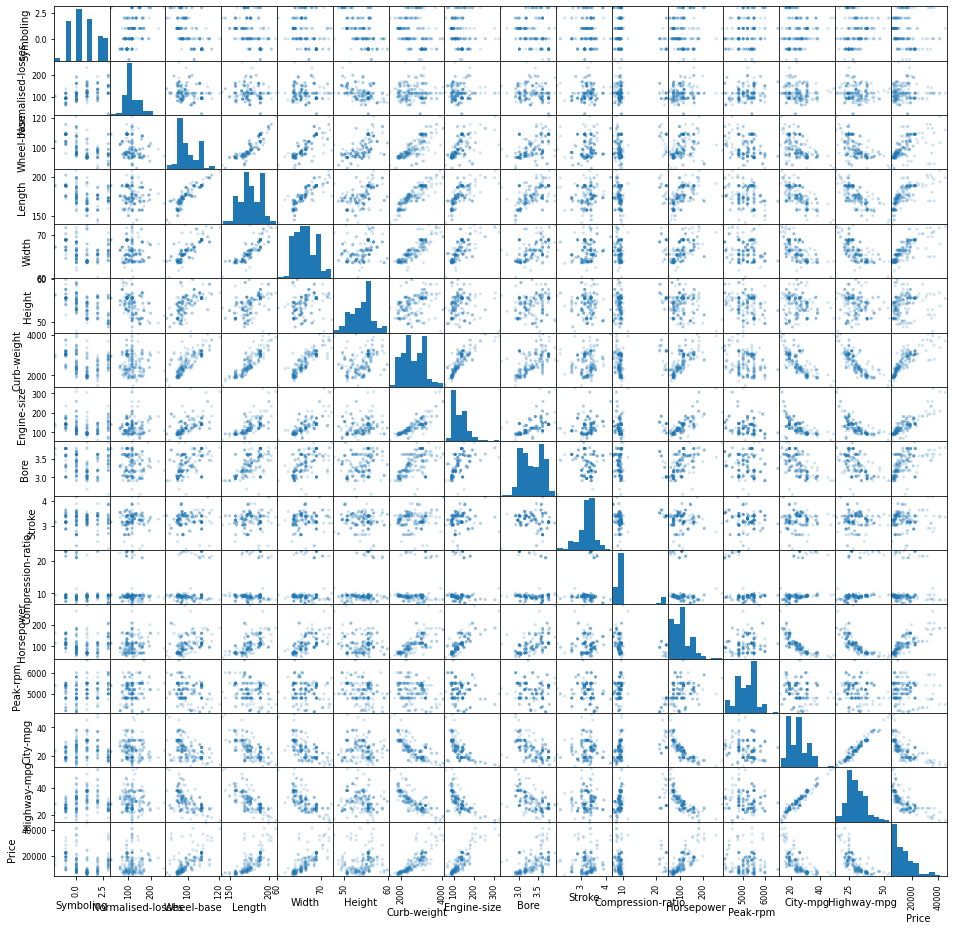

In [31]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns
car_numeric = automobile.select_dtypes(include=np.number)
scatter_matrix(car_numeric,alpha=0.2,figsize=(16,16),diagonal='hist')
plt.show()

In [32]:
automobile.to_excel("output_final.xlsx") 